# NLP Visualizations of Macbeth and Romeo and Juliet

Execute the following cell for important imports.

In [1]:
import requests
import matplotlib.pyplot as plt
import nltk

from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

Execute the following cell to get the text of "Macbeth" and "Romeo and Juliet" from [Project Gutenberg](https://www.gutenberg.org/) 

In [2]:
target_url = "https://www.gutenberg.org/files/1533/1533-0.txt"
response = requests.get(target_url)
macbeth_string = response.text
macbeth_string = macbeth_string.split('*** START OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[1]
macbeth_string = macbeth_string.split('*** END OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[0]
macbeth_string = macbeth_string.lower()

target_url = "https://www.gutenberg.org/files/1513/1513-0.txt"
response = requests.get(target_url)
r_j_string = response.text
r_j_string = r_j_string.split('*** START OF THE PROJECT GUTENBERG EBOOK 1513 ***')[1]
r_j_string = r_j_string.split('*** END OF THE PROJECT GUTENBERG EBOOK 1513 ***')[0]
r_j_scenes = [i.lower() for i in r_j_string.split('SCENE')[1:]]

You now have the following variables:
* `macbeth_string`: this string contains the full text of "Macbeth"
* `r_j_string`: this string contains the full text of "Romeo and Juliet"
* `r_j_scenes`: the text from each scene of "Romeo and Juliet" is included in this Python list, with one scene per list item

Make two new variables:
* a Python list of stopwords
* a variable for using VADER's SentimentIntensityAnalyzer

In [3]:
stop_words = (stopwords.words('english'))
senti = vader.SentimentIntensityAnalyzer()

## Macbeth

Make a list of the words in Macbeth by tokenizing `macbeth_string`:

In [4]:
macbeth_words = word_tokenize(macbeth_string)

Next, make a list of positive words and a list of negative words using the `polarity_scores` method of VADER's SentimentIntensityAnalyzer.  To do this:
* Write a for loop that iterates over your Macbeth word list
  * If the compound score of a word is positive, add the word to the positive-word list
  * If the compound score of a word is negative, add the word to the negative-word list
  * If the compound score is 0, the word should not be added to either list

In [5]:
positive_words = []
negative_words = []

for word in macbeth_words:
  score = senti.polarity_scores(word)
  if score['compound'] > 0:
    positive_words.append(word)
  elif score['compound'] < 0:
    negative_words.append(word)

1. Find the 15 most common negative words in Macbeth and the 15 most common positive words
    * Note that if you have a list variable called `mylist`, you can get the frequencies of words in `mylist` by using `nltk.FreqDist(mylist)`, and you can get the `n` most common words with `nltk.FreqDist(mylist).most_common(n)`.
2. Make a horizontal bar plot similar to the plots in the following image
3. Comment on similarities and differences to the Macbeth plot below

(Plot taken from a [2018 post by Peer Chirstensen](https://web.archive.org/web/20230129014418/https://peerchristensen.netlify.app/post/fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies/))

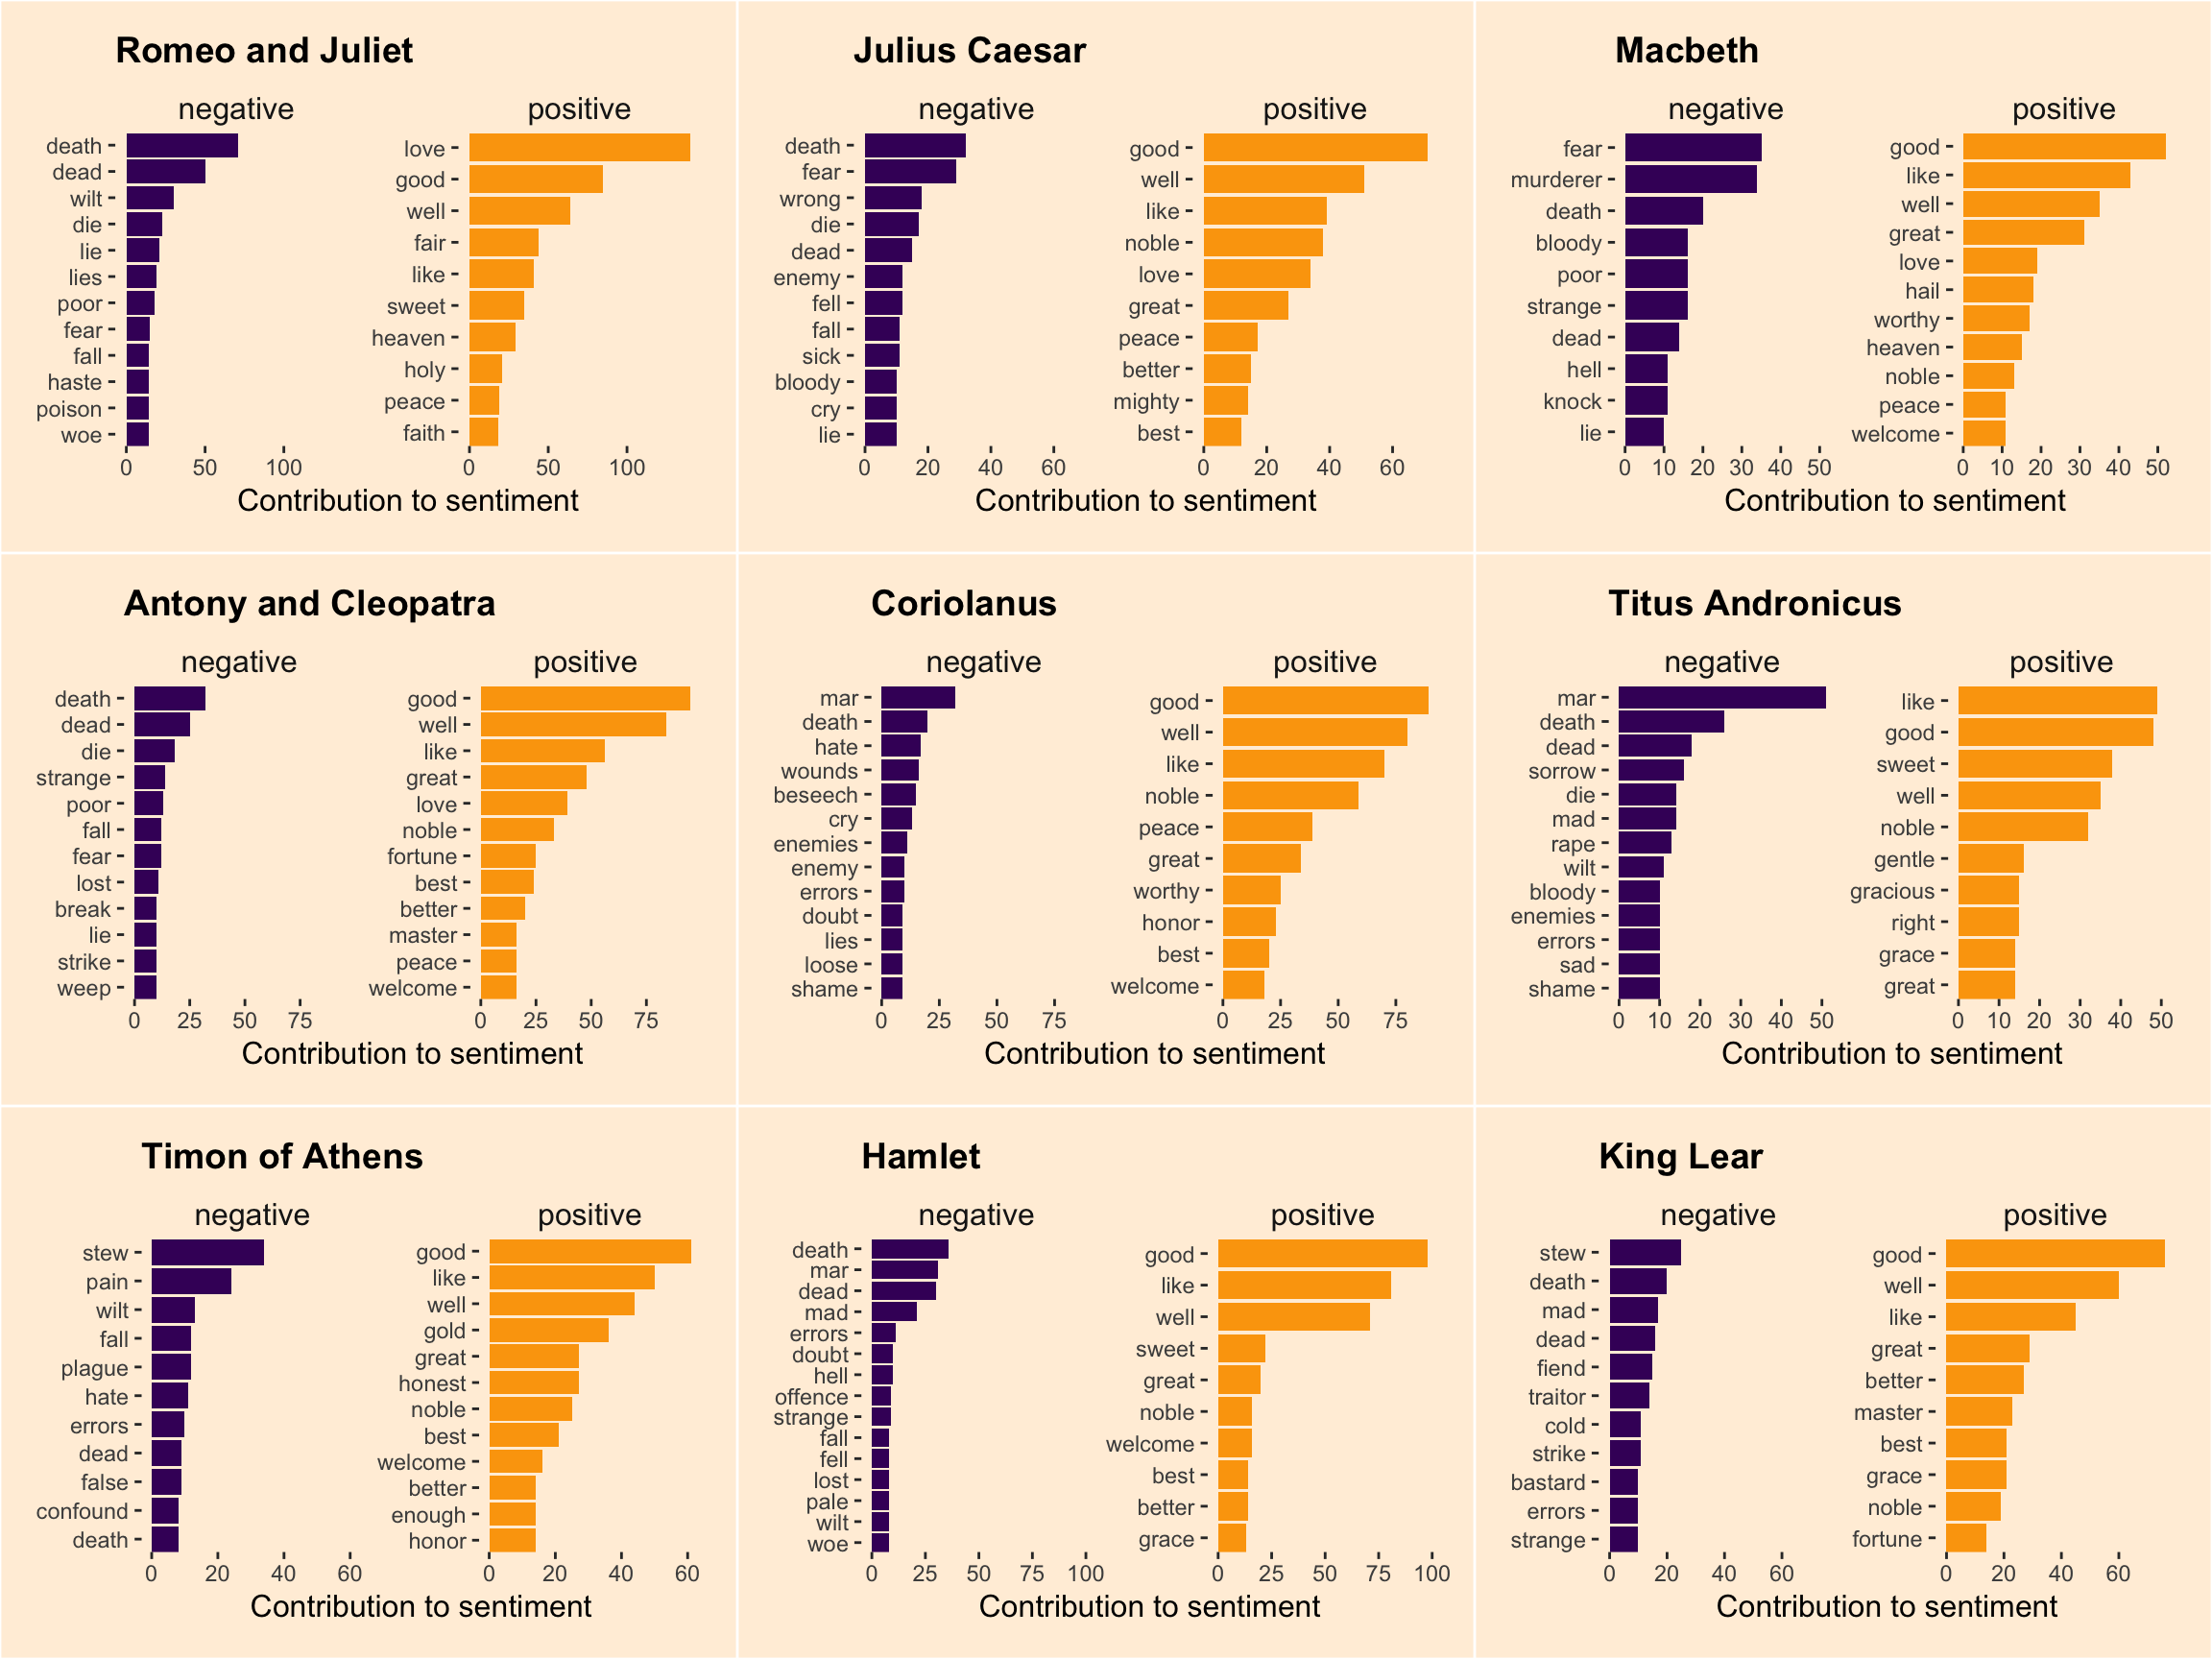

<BarContainer object of 15 artists>

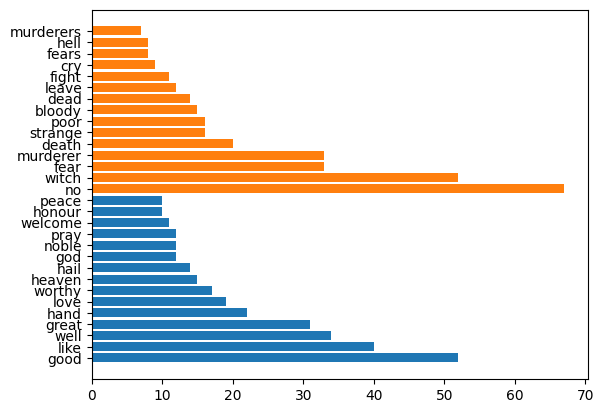

In [6]:
positive_common15 = nltk.FreqDist(positive_words).most_common(15)
negative_common15 = nltk.FreqDist(negative_words).most_common(15)

pos_common_words = []
pos_common_freq = []
for i in positive_common15:
    pos_common_words.append(i[0])
    pos_common_freq.append(i[1])
    
neg_common_words = []
neg_common_freq = []
for i in negative_common15:
    neg_common_words.append(i[0])
    neg_common_freq.append(i[1])

plt.barh(pos_common_words, pos_common_freq)
plt.barh(neg_common_words, neg_common_freq)


The Macbeth plot from 2018 feature similar words with the plot I created above, but is more specific with its most common words. My plot has words with the same stem, like "murderer" and "murderers", but the 2018 plot only has its main word, "murderer" with a combined score.

The word list we created from Macbeth did not have the stopwords removed.
* Repeat the above analysis, but do so for a list of Macbeth words in which the stopwords have been removed.
* What changes?

<BarContainer object of 15 artists>

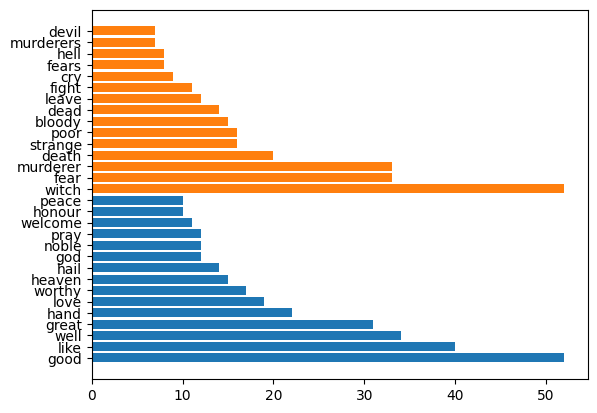

In [7]:
macbeth_noStop_words = []
for word in macbeth_words:
  if word not in stop_words:
    macbeth_noStop_words.append(word)
    
NS_positive_words = []      # NS stands for noStop
NS_negative_words = []

for word in macbeth_noStop_words:
  score = senti.polarity_scores(word)
  if score['compound'] > 0:
    NS_positive_words.append(word)
  elif score['compound'] < 0:
    NS_negative_words.append(word)
    
NS_positive_common15 = nltk.FreqDist(NS_positive_words).most_common(15)
NS_negative_common15 = nltk.FreqDist(NS_negative_words).most_common(15)

NS_pos_common_words = []
NS_pos_common_freq = []
for i in NS_positive_common15:
    NS_pos_common_words.append(i[0])
    NS_pos_common_freq.append(i[1])
    
NS_neg_common_words = []
NS_neg_common_freq = []
for i in NS_negative_common15:
    NS_neg_common_words.append(i[0])
    NS_neg_common_freq.append(i[1])

plt.barh(NS_pos_common_words, NS_pos_common_freq)
plt.barh(NS_neg_common_words, NS_neg_common_freq)  

As expected, the stop words in the plot were removed! In particular, 'no' from the negative word bar plot was replaced with 'devil' but to my knowledge, the positive word bar plot remained the same.

* Repeat the above analysis one more time -> in addition to removing the stopwords, use the Porter stemmer to get a list of stemmed words before you calculate the word frequencies.
* What words in your plot have now been counted together?

<BarContainer object of 15 artists>

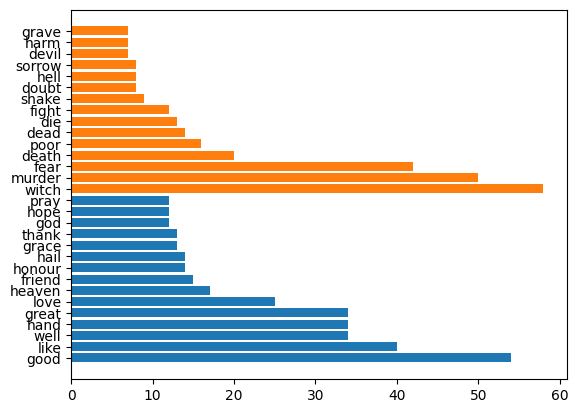

In [8]:
ST_macbeth_words = [PorterStemmer().stem(w) for w in macbeth_noStop_words]
ST_positive_words = []      # ST stands for stemmed
ST_negative_words = []

for word in ST_macbeth_words:
  score = senti.polarity_scores(word)
  if score['compound'] > 0:
    ST_positive_words.append(word)
  elif score['compound'] < 0:
    ST_negative_words.append(word)
    
ST_positive_common15 = nltk.FreqDist(ST_positive_words).most_common(15)
ST_negative_common15 = nltk.FreqDist(ST_negative_words).most_common(15)

ST_pos_common_words = []
ST_pos_common_freq = []
for i in ST_positive_common15:
    ST_pos_common_words.append(i[0])
    ST_pos_common_freq.append(i[1])
    
ST_neg_common_words = []
ST_neg_common_freq = []
for i in ST_negative_common15:
    ST_neg_common_words.append(i[0])
    ST_neg_common_freq.append(i[1])

plt.barh(ST_pos_common_words, ST_pos_common_freq)
plt.barh(ST_neg_common_words, ST_neg_common_freq)  

Words in the negative bar plot like "fear"/"fears" and "murderer"/"murderers" were counted together. Words in the positive bar plot also were changed but I am unsure of the pattern in which they did. For example, the frequency of hand increased and peace was removed but I didn't find any words that shared that stem in previous plots.

## Romeo and Juliet

We are now going to plot the evolution of sentiment in Romeo and Juliet.

This is motivated by the following plot (also from the afore-mentioned link):

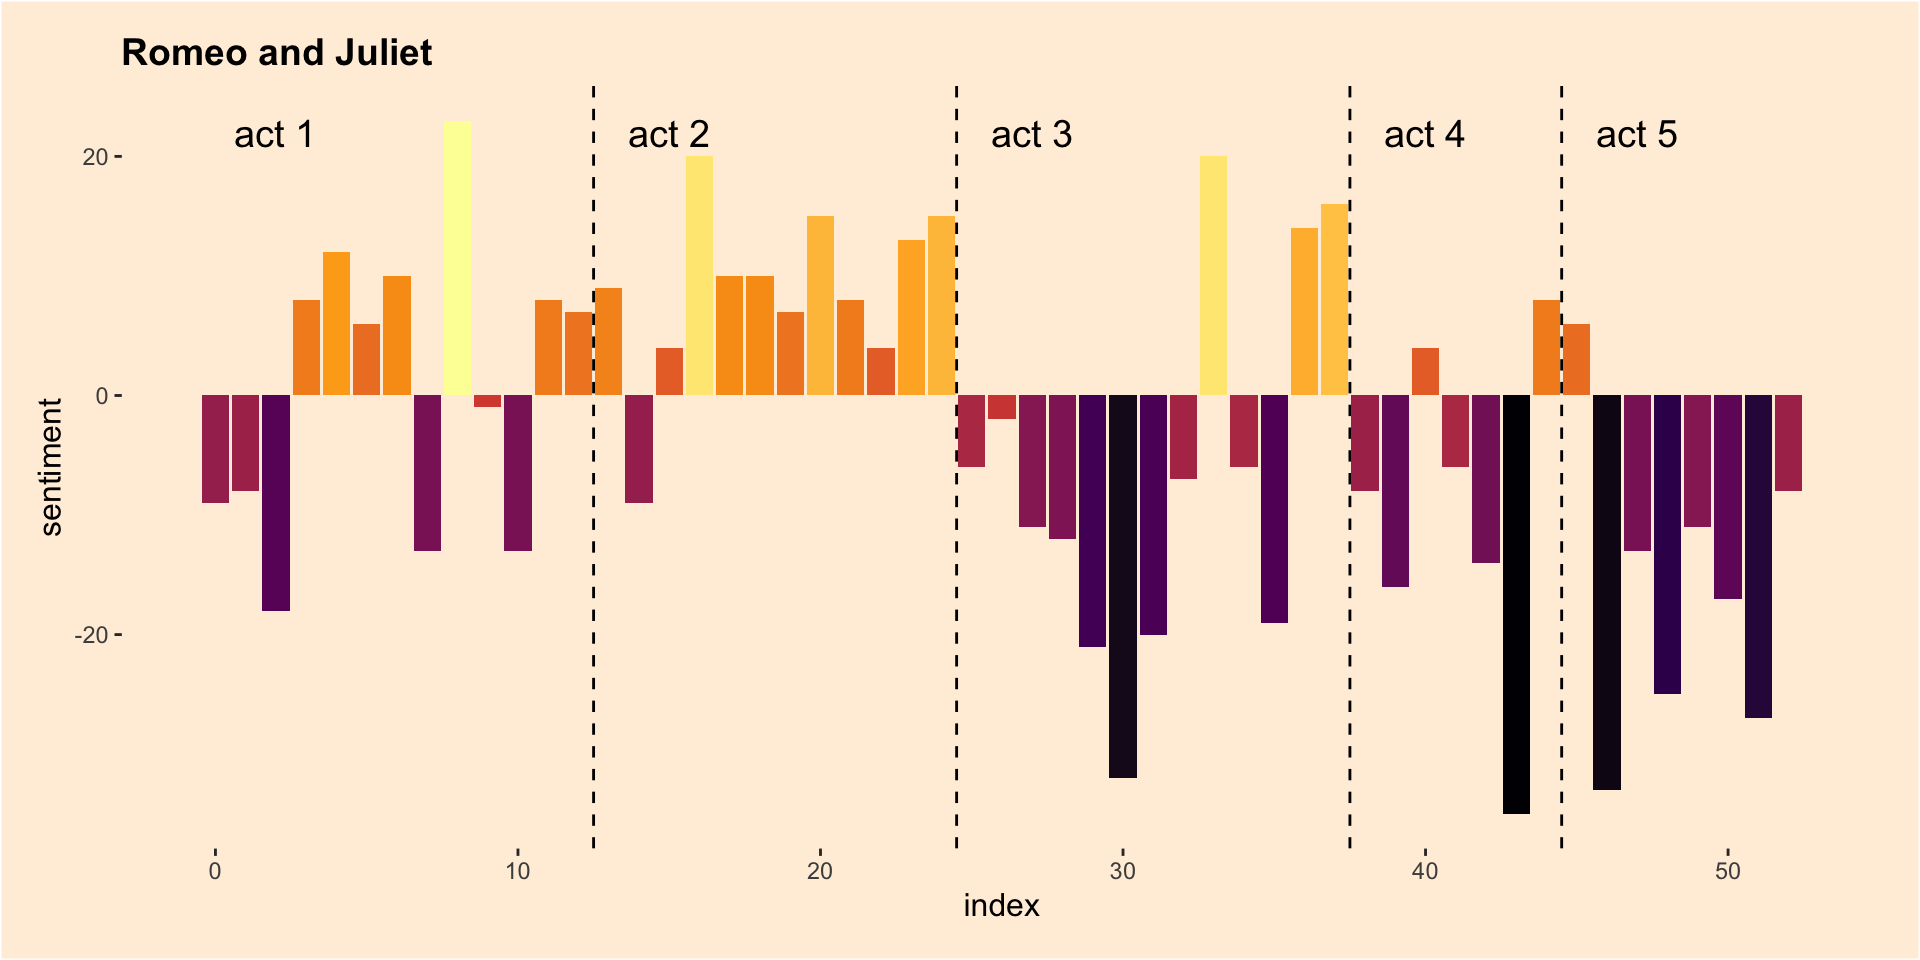

We are going to make a couple different plots.

First:
* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Sum the compound sentiment scores of every word in the scene (using VADER's SentimentIntensityAnalyser's polarity_scores method to get the compound sentiment score for each word).
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Comment on its resemblance to the Romeo and Juliet plot above.

<BarContainer object of 25 artists>

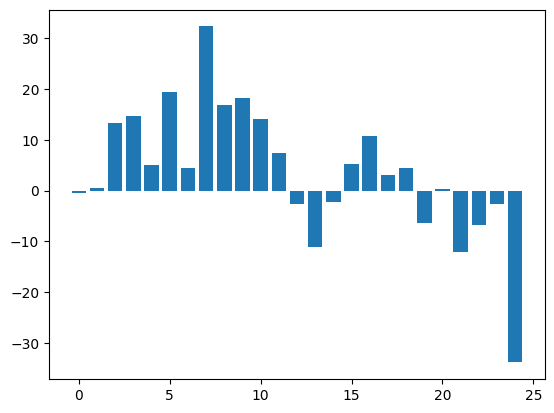

In [12]:
r_j_sceneNum = []
r_j_sceneScores = []

num = 0     # initializes sceneNum to 0
for scene in r_j_scenes:
  r_j_sceneNum.append(num)
  totalScore = 0
  sceneWords = word_tokenize(scene)
  for word in sceneWords:
    score = senti.polarity_scores(word)    # scores each word in scene
    totalScore += score['compound']     # adds score to total
  r_j_sceneScores.append(totalScore)   # adds to list for scene total
  num += 1

plt.bar(r_j_sceneNum, r_j_sceneScores)

The above plot does not appear to be organized by scene but by act, which is not something included in the plot I created. However, I am still able to make some comparisons. I do notice some differences, such as my plot detected no net negative sentiments in scenes in Act I (scenes 1-5) but there was in the attached plot.

Second:
* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 to the score for each positive word (compound_score > 0) and substracting 1 from the score for each negative word (compound_score < 0)**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous method of calculating the total scene sentiment score?

<BarContainer object of 25 artists>

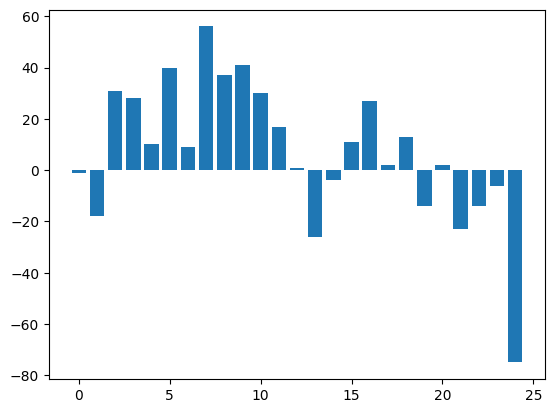

In [13]:
r_j_sceneNNum = []
r_j_sceneSScores = []

num2 = 0

for scene in r_j_scenes:
  r_j_sceneNNum.append(num2)
  totalScore = 0
  sceneWords = word_tokenize(scene)
  for word in sceneWords:
    score = senti.polarity_scores(word)
    if score['compound'] > 0:
      totalScore += 1
    elif score['compound'] < 0:
      totalScore -= 1
  r_j_sceneSScores.append(totalScore)   # adds to list for scene total
  num2 += 1

plt.bar(r_j_sceneNNum, r_j_sceneSScores)

The overall trends of the plot appear the same, with the exception of scene 2, where it changes to negative. However, the values are larger, with scores going as high as 60 and low as 80 in this new plot.

Next, we are going to use a new lexicon to assess positive and negative word sentiment, the opinion_lexicon (https://www.nltk.org/api/nltk.corpus.reader.opinion_lexicon.html)

Execute the following cell to make a set of positive words and a set of negative words.

In [14]:
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

The following cell is an example of checking whether a word is positive or negative according to this opinion lexicon.  Try it out with a couple words.

In [15]:
testword = 'love'
if testword in positive_words:
    print(testword + ' is positive')
elif testword in negative_words:
    print(testword + ' is negative')
else:
    print(testword + ' is neither positive nor negative')

love is positive


Third plot:

* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the `positive_words` and `negative_words` sets.**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

<BarContainer object of 25 artists>

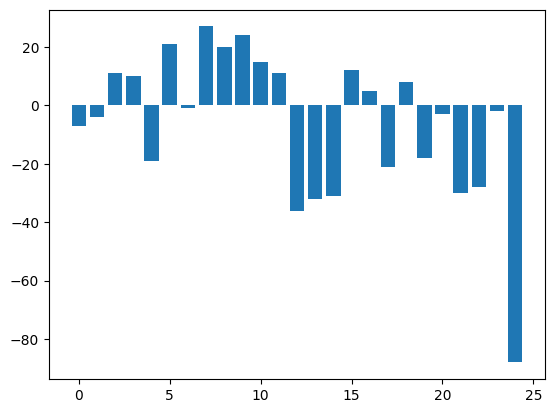

In [16]:
r_j_sceneNNNum = []
r_j_sceneSSScores = []

num3 = 0

for scene in r_j_scenes:
  r_j_sceneNNNum.append(num3)
  totalScore = 0
  sceneWords = word_tokenize(scene)
  for word in sceneWords:
    if word in positive_words:
      totalScore += 1
    elif word in negative_words:
      totalScore -= 1
  r_j_sceneSSScores.append(totalScore)   # adds to list for scene total
  num3 += 1

plt.bar(r_j_sceneNNNum, r_j_sceneSSScores)

The changes done with this plot are greater than in the changes between the first two! It's looking a lot more like the attached plot, with a more dynamic change in trends. It seems as though the new lexicon has different opinions on the sentiment of certain words.

Fourth plot:

* Take the entire string of Romeo and Juliet (`r_j_string`) and tokenize it into words.
* Calculate a total sentiment score for each consecutive group of 500 words.
  * Do this as immediately above by adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the `positive_words` and `negative_words` sets.
* Make a bar plot that has the group number (0,1,2,3,...) on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

<BarContainer object of 65 artists>

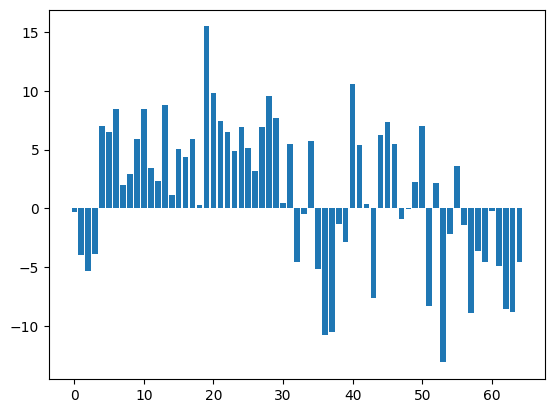

In [17]:
r_j_words = word_tokenize(r_j_string)
r_j_scores = []
r_j_set = []
num4 = 0

for i in range(0, len(r_j_words), 500):
  r_j_set.append(num4)
  totalScore = 0
  wordSet = r_j_words[i:i + 500]
  for word in wordSet:
    score = senti.polarity_scores(word)
    totalScore += score['compound']
  r_j_scores.append(totalScore)
  num4 += 1
  
plt.bar(r_j_set, r_j_scores)

This plot is significantly different than the previous plots, having more bars. But other than that, it shows similar evolution trends in sentiment.

What method would you use if you had to report on the evolution of sentiment in Romeo and Juliet to an audience of Shakespearian academics?

To report on the evolution of sentiment in Romeo and Juliet, I would likely use the first method, since it adds the polarity score per word, rather than doing a flat 1 or -1 regardless of its specific score. I think words like "murder" should be counted as more negative than words like "no", adding to the report's accuracy. 